In [1]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

## **Data Exploration**

In [2]:
df = pd.read_excel('Data.xlsx')

In [3]:
# Convert and save to CSV
df.to_csv('Data.csv', index=False)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,Null,11753


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.shape

(10683, 11)

In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [10]:
for col in df.columns:
  count_values = df[col].value_counts()
  print(f'Column called \033[91m{col}\033[0m has \033[94m{len(count_values)}\033[0m unique values')

Column called Airline has 12 unique values
Column called Date_of_Journey has 44 unique values
Column called Source has 5 unique values
Column called Destination has 6 unique values
Column called Route has 128 unique values
Column called Dep_Time has 222 unique values
Column called Arrival_Time has 1343 unique values
Column called Duration has 368 unique values
Column called Total_Stops has 5 unique values
Column called Additional_Info has 10 unique values
Column called Price has 1870 unique values


## **Data Preprocessing**

In [11]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [12]:
# Total number of duplicate rows in your dataset and count duplicates
value = len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ", value)
duplicates = df[df.duplicated()]

The number of duplicate values in the data set is =  220


In [13]:
# Check for NaN values
nan_values = df.isnull()
print(nan_values)

       Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0        False            False   False        False  False     False   
1        False            False   False        False  False     False   
2        False            False   False        False  False     False   
3        False            False   False        False  False     False   
4        False            False   False        False  False     False   
...        ...              ...     ...          ...    ...       ...   
10678    False            False   False        False  False     False   
10679    False            False   False        False  False     False   
10680    False            False   False        False  False     False   
10681    False            False   False        False  False     False   
10682    False            False   False        False  False     False   

       Arrival_Time  Duration  Total_Stops  Additional_Info  Price  
0             False     False        False            

### Handling Missing values

In [14]:
df['Additional_Info'].fillna('Unknown', inplace=True)
df['Total_Stops'] = df['Total_Stops'].astype(str).fillna('0 stops')


In [15]:
print("Number of missing values in each column:\n", df.isnull().sum())
print("Number of duplicate rows:", len(df[df.duplicated()]))


Number of missing values in each column:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64
Number of duplicate rows: 220


### Remove or Handle Infinite values

In [16]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)


### Convert 'Total_Stops' to Numeric

In [17]:
def transform_total_stops(stop_str):
    if isinstance(stop_str, str):
        numbers = re.findall(r'\d+', stop_str)
        return int(numbers[0]) if numbers else 0
    return 0



In [18]:
# Apply transformation
df['Total_Stops'] = df['Total_Stops'].apply(transform_total_stops)
print(df['Total_Stops'].head())

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64


## **EDA and Data Visualization**

In [19]:
# Distribution of categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

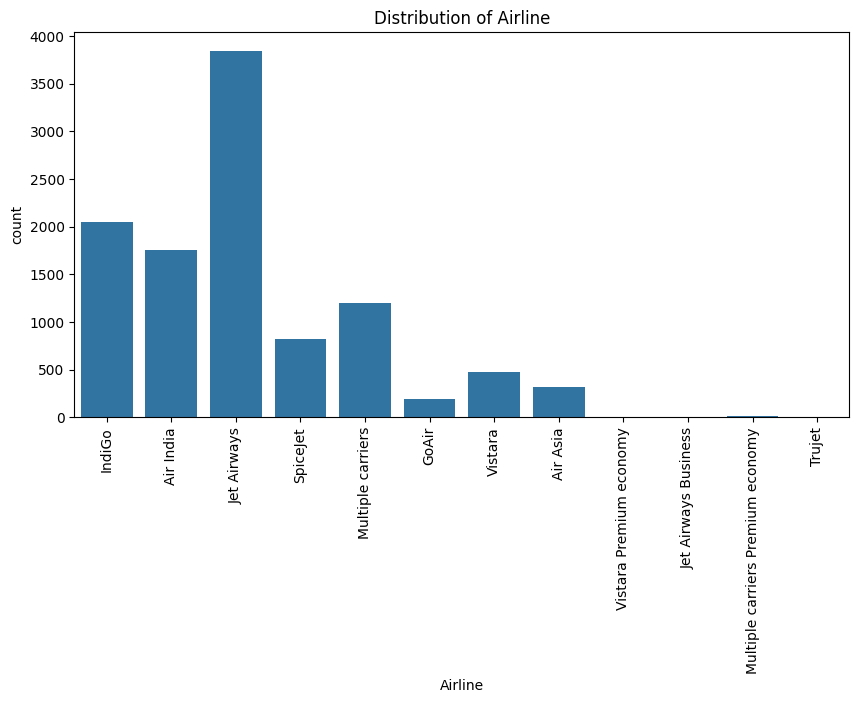

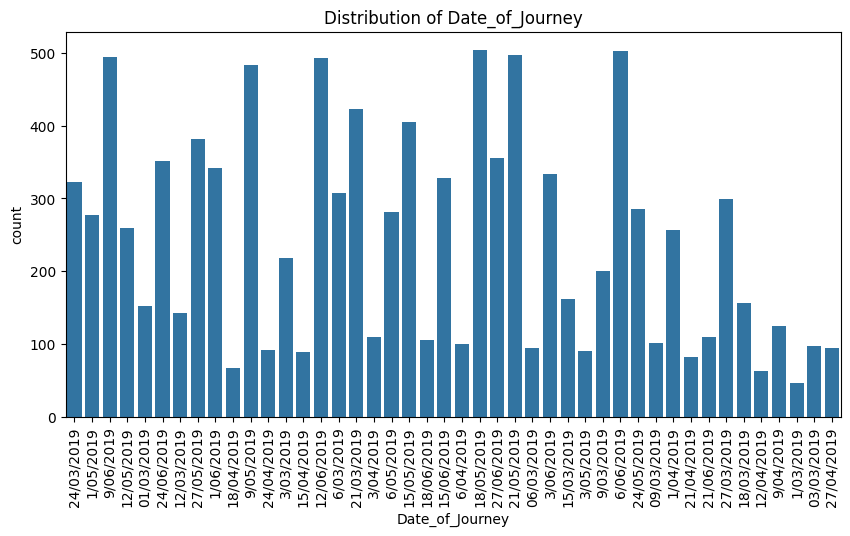

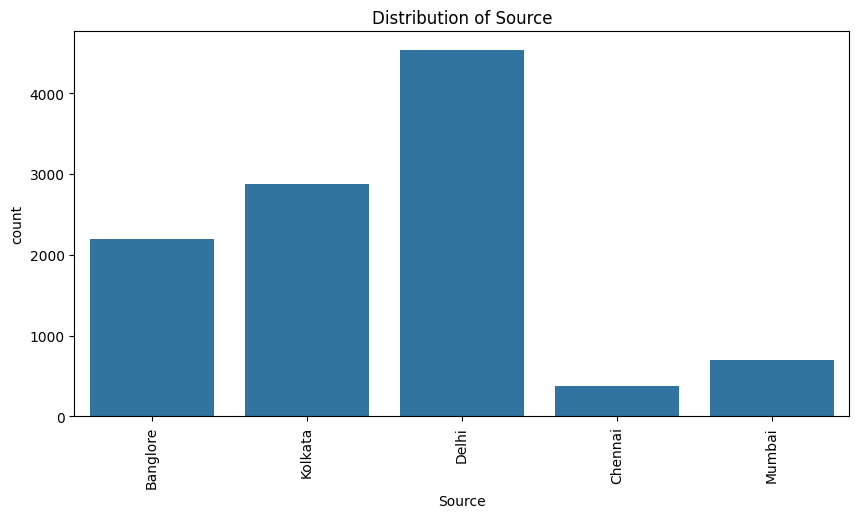

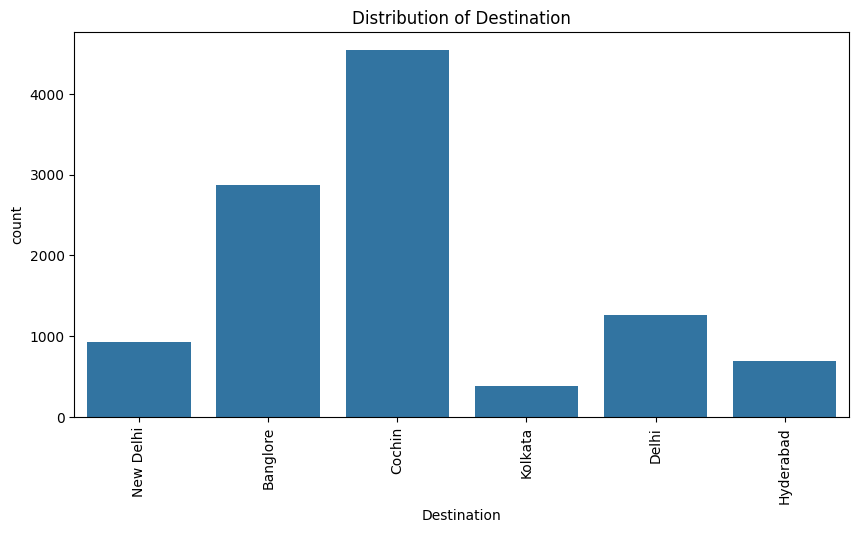

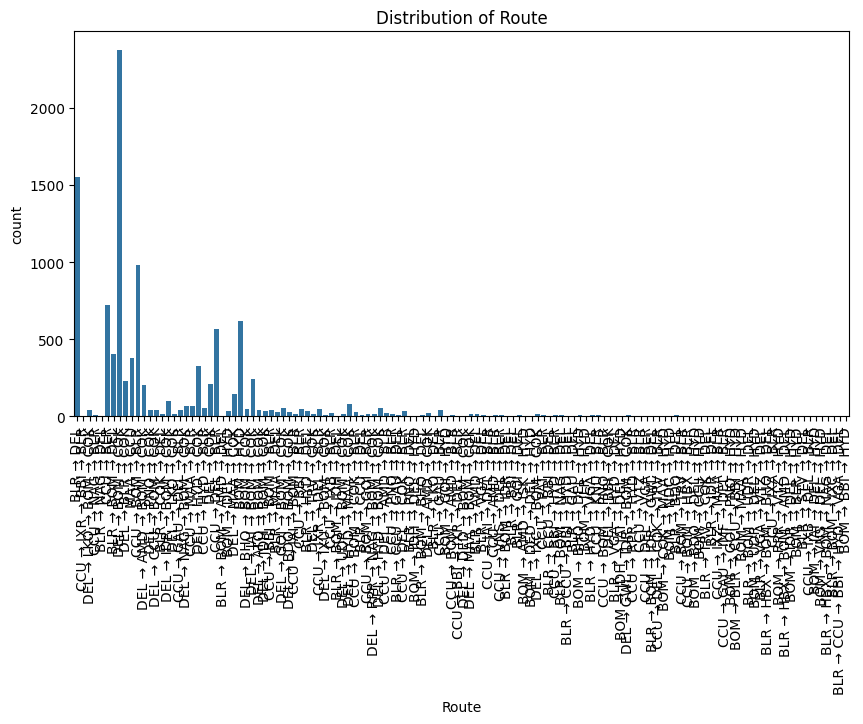

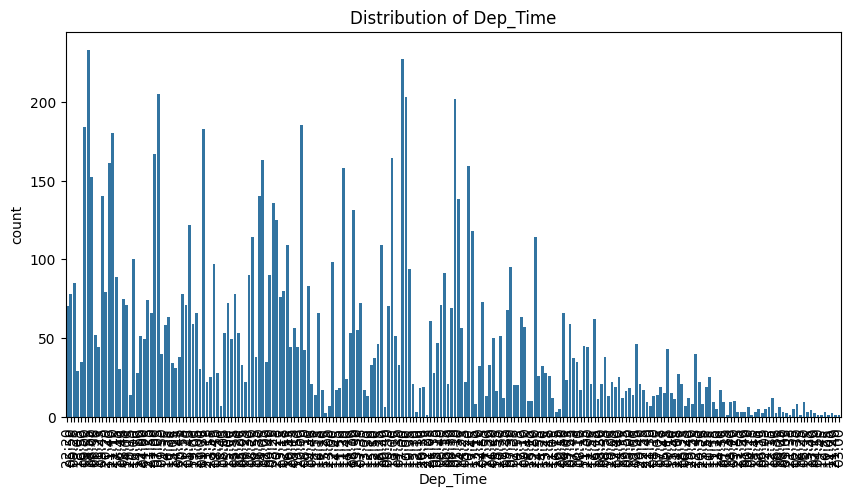

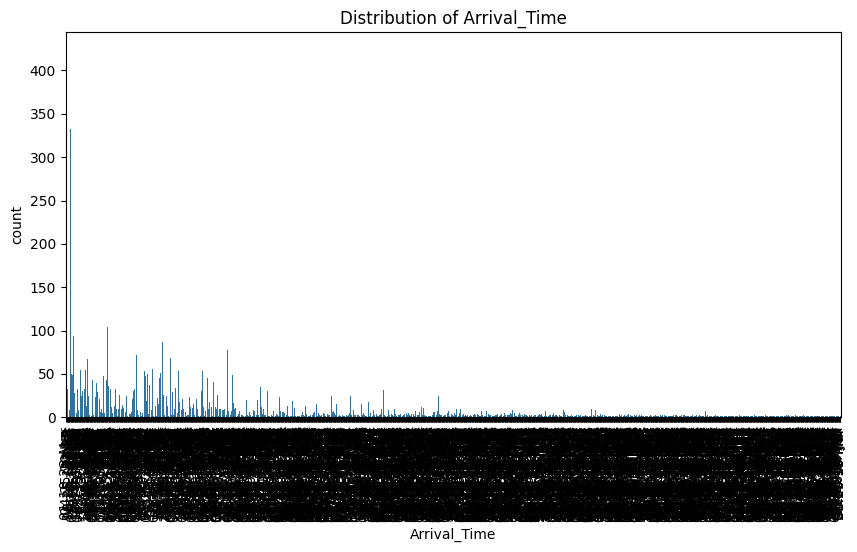

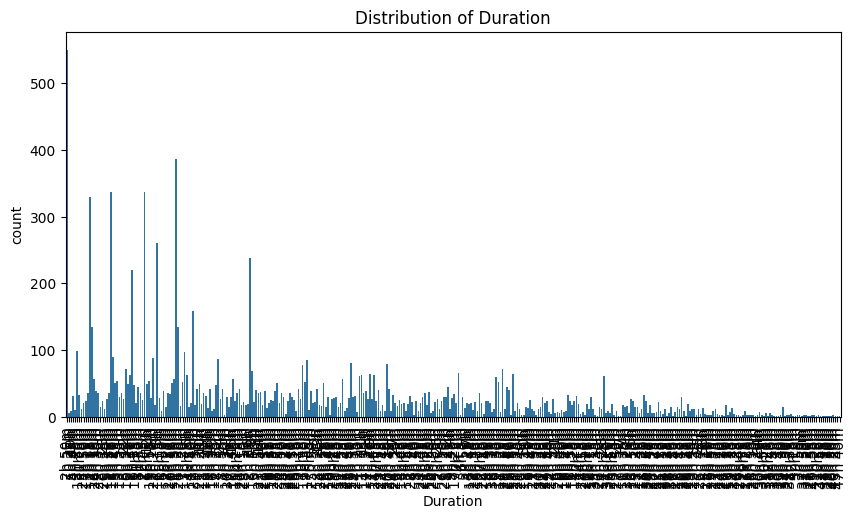

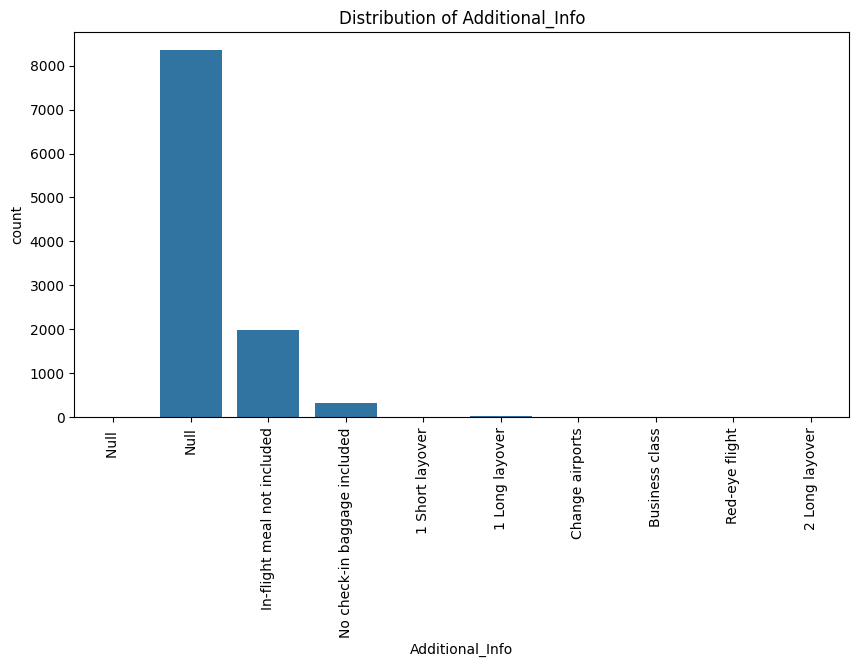

In [20]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [21]:
# Boxplot for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

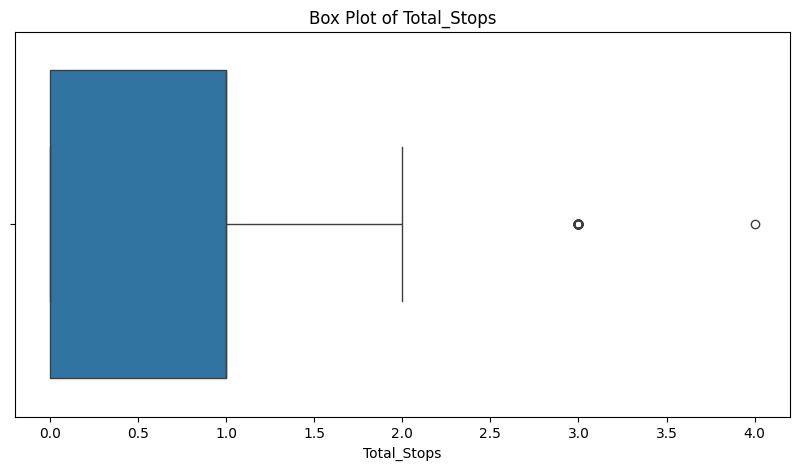

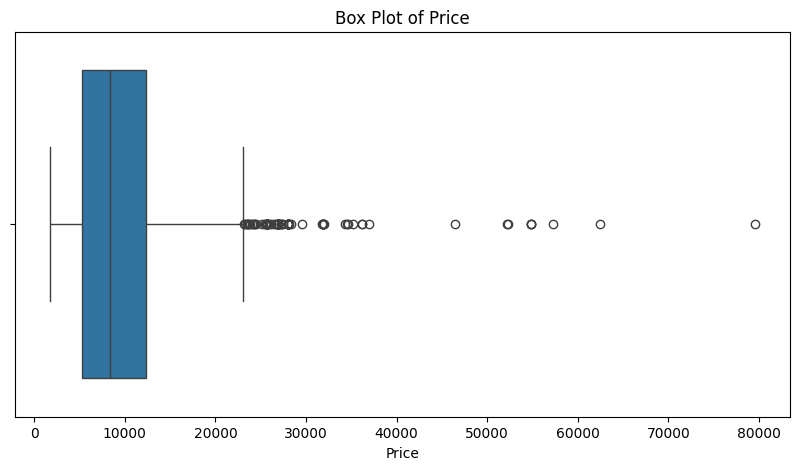

In [22]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [23]:
# Z-score method for outliers
df['z_score'] = zscore(df['Price'])
outliers = df[df['z_score'].abs() > 3]
print(outliers)

                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m            1   
396          DEL 

In [24]:
# Interquartile range (IQR) method for outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]

In [25]:
print(outliers)

                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m            1   
396          DEL 

## **Feature Engineering**

### Extract Features from Dates and Times

In [26]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_year'] = df['Date_of_Journey'].dt.year

In [27]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute

In [28]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%d %b', errors='coerce')
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

### Convert 'Duration' to Minutes

In [29]:
def duration_to_minutes(duration_str):
    hours = re.findall(r'(\d+)h', duration_str)
    minutes = re.findall(r'(\d+)m', duration_str)
    total_minutes = 0
    if hours:
        total_minutes += int(hours[0]) * 60
    if minutes:
        total_minutes += int(minutes[0])
    return total_minutes

df['Duration'] = df['Duration'].apply(duration_to_minutes)


In [30]:
# Find minimum, maximum and the average duration of all flights
print(f'Maximum flight duration {df["Duration"].max()}')
print(f'Minimum flight duration {df["Duration"].min()}')
print(f'average flights duration {df["Duration"].median()}')

Maximum flight duration 2860
Minimum flight duration 5
average flights duration 520.0


### Convert 'Total_Stops' to Numeric

In [31]:
df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})


### Log Transformation for 'Price'

In [32]:
df['Price'] = np.log1p(df['Price'])


### One-Hot Encoding for Categorical Columns

In [33]:
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']



In [34]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)

### Prepare Features and Target

In [35]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']


## **Model Training and Evaluation**

### Split Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = (X_train[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

for col in X_test.select_dtypes(include=['datetime64']).columns:
    X_test[col] = (X_test[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [38]:
# Handle missing values using imputation (replace NaNs with the mean of the column)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Arrival_Time' 'Arrival_Hour' 'Arrival_Minute']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Arrival_Time' 'Arrival_Hour' 'Arrival_Minute']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}



In [40]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"  R^2: {r2_score(y_test, y_pred)}")
    print("")

Linear Regression:
  RMSE: 0.10360143298454264
  R^2: 0.9594751338550613

Ridge Regression:
  RMSE: 0.10169090044465887
  R^2: 0.9609560048744819

Lasso Regression:
  RMSE: 0.4149228892268942
  R^2: 0.34998279674428767



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.99907e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Decision Tree:
  RMSE: 0.002092568300331224
  R^2: 0.9999834670882276

Random Forest:
  RMSE: 0.00186839871292154
  R^2: 0.9999868195820186

Gradient Boosting:
  RMSE: 0.003621397209151321
  R^2: 0.9999504843608639

XGBoost:
  RMSE: 0.015168677789696834
  R^2: 0.9991312686054075



## **Hyperparameter Tuning Using Random forest**

In [41]:
rf_base = RandomForestRegressor(random_state=42)

In [42]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [49]:
random_search = RandomizedSearchCV(estimator=rf_base,
                                    param_distributions=param_distributions,
                                    n_iter=10,
                                    scoring='neg_mean_squared_error',
                                    cv=3,
                                    verbose=1,
                                    n_jobs=-1,
                                    random_state=42)

In [50]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [51]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_


In [52]:
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}


In [55]:
# Predict and evaluate
y_pred_rf_tuned = best_model.predict(X_test)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)


In [56]:
print(f"Tuned Random Forest:")
print(f"  RMSE: {rmse_rf_tuned}")
print(f"  R^2: {r2_rf_tuned}")

Tuned Random Forest:
  RMSE: 0.003037427376613198
  R^2: 0.9999651661185084


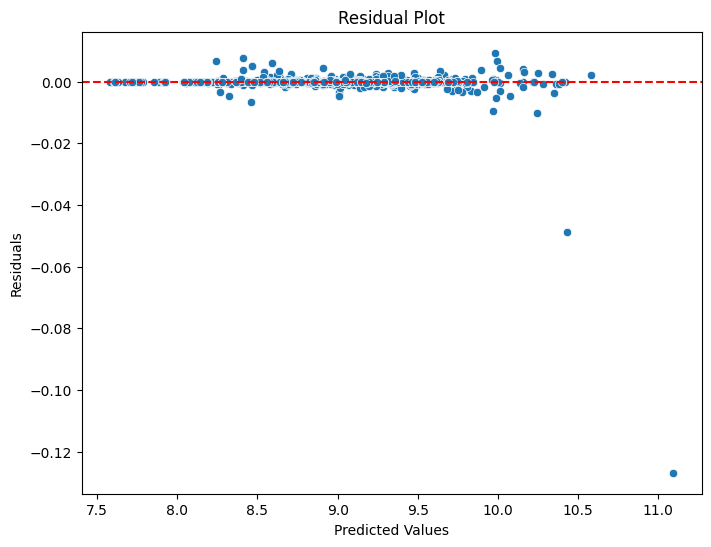

In [64]:
# Residuals
residuals = y_test - y_pred_rf_tuned


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

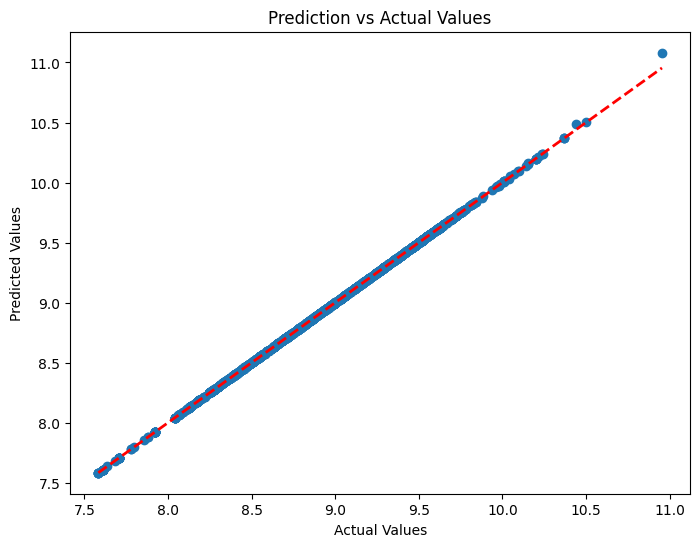

In [65]:
# Prediction vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_tuned)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values')
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation 
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error', error_score='raise')


In [67]:
# Convert negative MSE to positive RMSE
rmse_scores = np.sqrt(-cv_scores)

In [68]:
# Print the results
print(f"Cross-validated RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")
print(f"Standard Deviation of RMSE: {rmse_scores.std()}")

Cross-validated RMSE scores: [0.02179203 0.01799461 0.01696993 0.0108736  0.01047848]
Mean RMSE: 0.015621730919909146
Standard Deviation of RMSE: 0.004347841357538245


# **Thank you :)**